# **Netflix: Movies and TV Shows (preprocessing and cleaning)**
 
The purpose of this notebook is to cleanse the comma-separated values into tables for __unique actors, directors, countries, and genres__. Then we'll analyze the reshaped dataset in case to find any interesting patterns and try to satisfy the task's expectations. 

**Task Details:**
As mentioned above,  columns in this dataset have comma-separated values, which makes it difficult to find how many titles an actor or actress appeared in or how many titles a director has filmed.

**Expected Submission:**
Cleanse the comma-separated values into tables for unique actors, directors, countries, and genres that can be linked back to the original dataset via the **"show_id"** field.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Import dataset
df = pd.read_csv('..//Datasets/netflix_titles.csv')

# Observe dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
# Check for null values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Country Cleanse
---
Let's analyze the variable which has the least number of null values. In this case, it is a "Country" where the movie/show was produced. It has 507 null values. Let's observe the first 5 records. 

In [5]:
df[df.country.isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...


Instead of drop these records with null countries, we can try to merge another dataset and restore the information. One of the famous and large movie/TV show datasets, which comes to mind, is IMDb.

In [6]:
imdb = pd.read_csv('..//Datasets/IMDb movies.csv', low_memory=False)
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


As the IMDb dataset doesn't contain a key to merge with the Netflix data, we'll try to merge by title and production year. But before we need to clean the IMDb dataset. 

In [7]:
# one record in 'year' colummn in IMDB has inappropriate formatting 
imdb[imdb.year.str.contains(' ')]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0


In [8]:
# we can replace it just by year
imdb.loc[imdb.year.str.contains(' '), 'year'] = imdb.loc[imdb.year.str.contains(' '), 'year'].str.rsplit(' ', expand=True)[2]

In [9]:
# convert release year to datetime format for the merging procedure
df.release_year = pd.to_datetime(df.release_year, format='%Y').dt.year
imdb.year = pd.to_datetime(imdb.year, format='%Y').dt.year

In [10]:
# drop duplicates in subset
imdb = imdb.drop_duplicates(subset=['original_title', 'year'])

In [11]:
# merge 2 datasets by title and release year
df = df.merge(imdb.add_suffix('_imdb'), how='left', left_on=['title','release_year'], right_on=['original_title_imdb','year_imdb'])

In [12]:
# number of counties
len(df[(df.country.isna()) & (df.country_imdb.notnull())])

13

Unfortunately, we can restore only **13** records. Anyway, it's better than nothing. The problem of small merged countries might be that the IMDb dataset is not big enough and doesn't contain information about some movies/TV shows in the Netflix dataset. The solution might be to merge a _larger movie/TV Show dataset_, which contains titles in a foreign language as well.

In [13]:
# replace these null country records 
df.loc[df.country.isna(), 'country'] = df.loc[df.country.isna(), 'country_imdb']

Let's perform the same procedure for cast and director columns:

In [14]:
# number of replaceble cast records
len(df.loc[(df.cast.isna()) & (df.actors_imdb.notnull())])

11

In [15]:
# replace null cast records by actors from IMDb
df.loc[(df.cast.isna()) & (df.actors_imdb.notnull()), 'cast'] = df.loc[(df.cast.isna()) & (df.actors_imdb.notnull()), 'actors_imdb']

In [16]:
# number of replaceble director
len(df.loc[(df.director.isna()) & (df.director_imdb.notnull())])

30

In [17]:
# replace null director records by director from IMDb
df.loc[(df.director.isna()) & (df.director_imdb.notnull()), 'director'] = df.loc[(df.director.isna()) & (df.director_imdb.notnull()), 'director_imdb']

As a result, we can restore 11 records that have actors' information and 30 records that contain information about directors from IMDb. Now drop the IMDb columns because they are useless for further analysis.

In [18]:
# drop IMDb columns 
df = df.drop(df.columns[12:], axis=1)

In [19]:
# check decreased null values
df.isna().sum()

show_id            0
type               0
title              0
director        2359
cast             707
country          494
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Country Analysis
---
Rather than show production countries with the highest value count and build a bar plot of that (if be honest, you can find this kind of information in other notebooks), I would like to analyze country interaction in the production process (such as with which country the US produce more movies/TV shows) and to create a new dataframe to satisfy task demand. 

One-hot encoding can help to perform it. Basically, this approach is using for market basket analysis to create association rules, but I think it is suitable in our case. 

In [20]:
# subset dataset and split 
country = df.loc[df.country.notnull(), 'country'].astype('str').apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
country = list(country)

# number of movies/TV shows without null values
len(country)

7293

In [21]:
# Instantiate encoder and identify unique country
encoder = TransactionEncoder().fit(country)

# One-hot encode
onehot_country = encoder.transform(country)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_country = pd.DataFrame(onehot_country, columns = encoder.columns_, index=df.loc[df.country.notnull(), 'show_id'])

# Print the one-hot encoded country dataset
onehot_country.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
show_id,,,,,,,,,,,,,,,,,,,,,
s1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
s5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


To interpret this table is not too hard. For example, a movie/TV Show with __show_id__ _"s1"_ was made in Brazil. Thus Brazil column is _True_ for this row. The rest columns are _False_. Using this new table, we can calculate the share of the movie/TV show production of each country in the Netflix dataset. 

In [22]:
# Print the one-hot encoded country share dataset
country_share = onehot_country.mean().sort_values(ascending=False).round(4) * 100
country_share

United States         45.19
India                 13.63
United Kingdom         9.90
Canada                 5.65
France                 4.80
                      ...  
Dominican Republic     0.01
Samoa                  0.01
Cyprus                 0.01
Jamaica                0.01
Afghanistan            0.01
Length: 122, dtype: float64

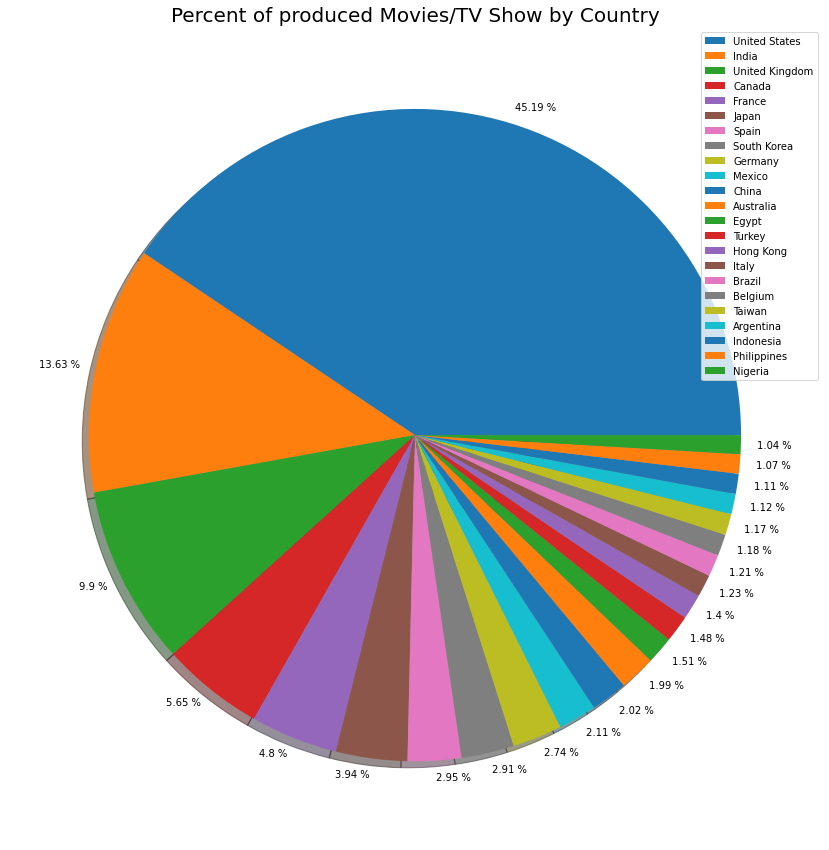

In [23]:
# take countries that share more than 1%
country_share = country_share[country_share > 1]
labels = country_share.round(3).astype('str') + ' %'

fig1, ax1 = plt.subplots(figsize=(20,15), facecolor='white')
ax1.pie(country_share, labels=labels, labeldistance=1.05,
        shadow=True)
plt.title('Percent of produced Movies/TV Show by Country', fontsize=20)
plt.legend(labels=country_share.index, loc='upper right')
plt.show()

According to the pie chart above, 45.2% of movies/TV Shows were produced by the United States and in collaboration of United States with other countries. Now, I am interested in what country collaborates more with the United States to produce movies/TV Shows.

In [24]:
# Compute frequency using the Apriori algorithm
frequency = apriori(onehot_country[onehot_country['United States'] == True], 
                    min_support = 0.0001, 
                    max_len = 4, 
                    use_colnames = True).rename({'support':'frequency', 'itemsets':'Countries'}, axis=1)

# sort row which contain 'United States' and more than 1 country
frequency = frequency[(frequency.Countries.apply(lambda t: 'United States' in t)) & (frequency.Countries.apply(lambda t: len(t) >= 2))]\
                    .sort_values('frequency', ascending=False).round(3)

# Print a preview of the frequency
frequency.head()

,frequency,Countries
531,0.070,"(United Kingdom, United States)"
207,0.057,"(United States, Canada)"
301,0.030,"(United States, France)"
324,0.022,"(Germany, United States)"
400,0.015,"(Japan, United States)"


According to the table above, 7% of all movies/shows (where the US was participated in production) were made in collaboration with the United Kingdom. 6% with Canada and 3% with France.  

Reset index of the one-hot encoded country dataset so we can link back to the original dataset via the "show_id" field.

In [25]:
onehot_country = onehot_country.reset_index()
onehot_country.head()

,show_id,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
0,s1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,s2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,s3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,s4,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,s5,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


# Genre Cleanse and Analysis
---
We can use the same one-hot encode technique for genre variable to clean and analyze it.

In [26]:
# subset dataset and split 
genre = df['listed_in'].apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
genre = list(genre)

# number of movies/TV Shows
len(genre)

7787

In [27]:
# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(genre)

# One-hot encode transactions
onehot = encoder.transform(genre)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_genre = pd.DataFrame(onehot, columns = encoder.columns_, index=df['show_id'])

# Print the one-hot encoded transaction dataset
onehot_genre.shape

(7787, 42)

There are 42 different genres in out dataset for 7787 Movies/TV Shows. We can calculate the number of Movies/TV Shows for each genre and visualize it.

In [28]:
genre_count = onehot_genre.sum().sort_values(ascending=False)
genre_count.head()

International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
dtype: int64

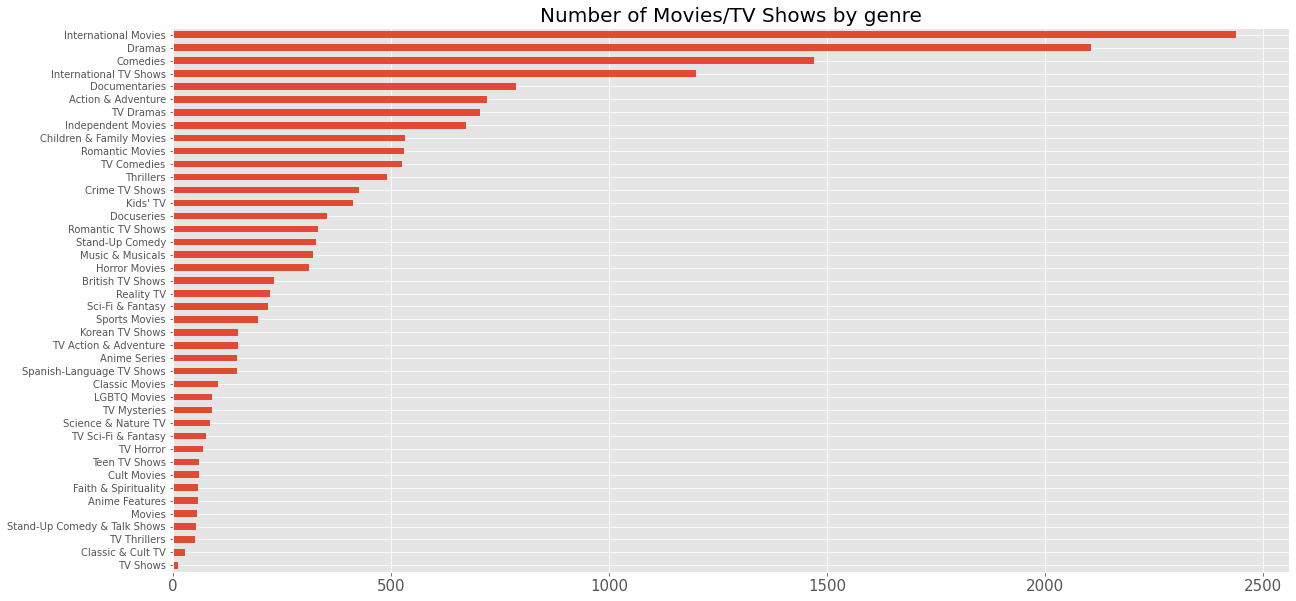

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
genre_count.sort_values().plot(kind='barh')
plt.tick_params(axis='x', labelsize=15)
plt.title('Number of Movies/TV Shows by genre', fontsize=20)
plt.show()

Looks like that the most popular genre is "International Movies" but for me it doesn't make any sense in term of the genre. Hence, let's look at the most common combination of genres with "International Movies."

In [30]:
# Compute frequent itemsets using the Apriori algorithm
frequency = apriori(onehot_genre[onehot_genre['International Movies'] == True], 
                    min_support = 0.0001, 
                    max_len = 2, 
                    use_colnames = True).rename({'support':'frequency', 'itemsets':'Genre'}, axis=1)

# sort row which contain 'International Movies' and more than 1 country
frequency = frequency[(frequency.Genre.apply(lambda t: 'International Movies' in t)) & (frequency.Genre.apply(lambda t: len(t) >= 2))]\
                    .sort_values('frequency', ascending=False).round(3)

frequency.head()

,frequency,Genre
65,0.531,"(Dramas, International Movies)"
48,0.300,"(Comedies, International Movies)"
26,0.145,"(Action & Adventure, International Movies)"
82,0.135,"(Romantic Movies, International Movies)"
59,0.108,"(International Movies, Documentaries)"


According to the table above, 53% of all International Movies (2437) are dramas. 30% are comedies and 15% in the action & adventure genre. 

You are probably questioned why the sum of the percent doesn't give a 100%. It is because that it might be a combination of genres, for example, drama and comedy. Apriori algorithms calculate any mentioned combination in all records and return its frequency.

For instance, suppose we have two international movies with genres "dramas, crime, documentaries" and "dramas, comedies". In this case, 100% of international movies are drama and 50% are crime. 

Let's look at the International TV Shows genres:

In [31]:
# Compute frequent itemsets using the Apriori algorithm
frequency = apriori(onehot_genre[onehot_genre['International TV Shows'] == True], 
                    min_support = 0.0001, 
                    max_len = 2, 
                    use_colnames = True).rename({'support':'frequency', 'itemsets':'Genre'}, axis=1)

# sort row which contain 'International Movies' and more than 1 country
frequency = frequency[(frequency.Genre.apply(lambda t: 'International TV Shows' in t)) & (frequency.Genre.apply(lambda t: len(t) >= 2))]\
                    .sort_values('frequency', ascending=False).round(3)

frequency.head()

,frequency,Genre
62,0.391,"(International TV Shows, TV Dramas)"
56,0.238,"(International TV Shows, Romantic TV Shows)"
40,0.224,"(International TV Shows, Crime TV Shows)"
61,0.170,"(International TV Shows, TV Comedies)"
58,0.108,"(International TV Shows, Spanish-Language TV S..."


The most popular genre of International TV Shows is also drama (40%). Nevertheless, romantic and crime are in the 2nd and 3rd places respectively, which is make sense for the TV Shows segment - people tend to watch detective and love dramas on TV).

Now, again, reset indexes of the one-hot genre dataset in case if we want to merge it with initial dataset.

In [32]:
# reset index with show_id information
onehot_genre = onehot_genre.reset_index()
onehot_genre.head()

,show_id,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,s2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,s3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,s4,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,s5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Cast Cleanse and Analysis
---
The same procedure fot the cast column.

In [33]:
# subset dataset and split 
cast = df.loc[df.cast.notnull(),'cast'].astype('str').apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
cast = list(cast)

# number of movies/TV Shows
len(cast)

7080

In [34]:
# Instantiate encoder and identify unique records
encoder = TransactionEncoder().fit(cast)

# One-hot encode
onehot = encoder.transform(cast)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_cast = pd.DataFrame(onehot, columns = encoder.columns_, index=df.loc[df.cast.notnull(),'show_id'])

# Print the one-hot encoded dataset
onehot_cast.shape

(7080, 32966)

According to the one-hot encoded dataset, there are 32966 actors/actresses in a total of 7080 Movies/TV Shows. Let's look at the top 5 actors/actresses with the highest numbers of Movies/TV shows:

In [35]:
onehot_cast.sum().sort_values(ascending=False).head()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
dtype: int64

Unfortunately, these names don't tell me anything. Thus, I created a function which returns a dataset with all necessary information:

In [36]:
# function that returns information about cast's Movies/TV Shows
def cast(actor):
    data = df[df.cast.astype('str').apply(lambda t: actor in t)]
    return(data)

In [37]:
# apply a function to the top actor and look at the first 5 Movies/TV Shows
cast('Anupam Kher').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",2016,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...
251,s252,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,..."
355,s356,Movie,Aiyaary,Neeraj Pandey,"Sidharth Malhotra, Manoj Bajpayee, Rakul Preet...",India,"May 15, 2018",2018,TV-MA,158 min,"Action & Adventure, Dramas, International Movies",When his protégé goes rogue and poses a grave ...
1159,s1160,Movie,C Kkompany,Sachin Yardi,"Mahesh Bhatt, Mithun Chakraborty, G.K. Desai, ...",India,"May 31, 2019",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...","To blow off some steam, friends Akshay, Joshi ..."
1257,s1258,Movie,Chaahat,Mahesh Bhatt,"Naseeruddin Shah, Shah Rukh Khan, Pooja Bhatt,...",India,"May 1, 2017",1996,TV-14,148 min,"Dramas, International Movies, Romantic Movies",A vulnerable singer is forced to choose betwee...


Now I am interested in the most filmed actor in any movie which the US has participated in the production. To do so, we need to reset indexes and merge the "onehot_cast" dataset with appropriate data. We could merge with initial Netflix data but the problem that we want to group all movies in which the US was involved in the production. The initial dataset cannot satisfy our desire, but the encoded country dataset can:)

Additionally, I'll show how created new datasets might be used.

In [38]:
# reset index
onehot_cast = onehot_cast.reset_index()

In [39]:
# merge show type first
cast_country = onehot_cast.merge(df[['show_id', 'type']], how='left')

# merge one-hot encoded country dataset
cast_country = cast_country.merge(onehot_country, how='left')

In [40]:
# filter by movie type and the US country
cast_us = cast_country.loc[(cast_country.type == 'Movie') & (cast_country['United States'] == True)]

In [41]:
# calculate the total number of American movies of actors/actresses
us_cast_count = cast_us.loc[:,onehot_cast.columns].drop('show_id', axis=1)\
                       .sum().sort_values(ascending=False)

# Top-5 actors/actresses
us_cast_count.head()

Adam Sandler         19
James Franco         18
Samuel L. Jackson    18
Nicolas Cage         17
Tara Strong          14
dtype: int64

Looks like Adam Sandler acted more than others in movies that were produced by the US and other countries. There are 19 his movies in the Netflix dataset. Let's observe these movies using our function:

In [42]:
# First 5 movies with Adam Sandler
cast('Adam Sandler').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
121,s122,Movie,50 First Dates,Peter Segal,"Adam Sandler, Drew Barrymore, Rob Schneider, S...",United States,"December 1, 2020",2004,PG-13,99 min,"Comedies, Romantic Movies",After falling for a pretty art teacher who has...
307,s308,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,"October 23, 2018",2018,TV-MA,74 min,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."
522,s523,Movie,Anger Management,Peter Segal,"Adam Sandler, Jack Nicholson, Marisa Tomei, Lu...",United States,"November 1, 2019",2003,PG-13,105 min,Comedies,After a gentle businessman is forced to get an...
802,s803,Movie,Bedtime Stories,Adam Shankman,"Adam Sandler, Keri Russell, Guy Pearce, Russel...",United States,"March 5, 2019",2008,PG,100 min,"Children & Family Movies, Comedies",Skeeter's life is turned upside down when the ...
901,s902,Movie,Big Daddy,Dennis Dugan,"Adam Sandler, Joey Lauren Adams, Jon Stewart, ...",United States,"October 1, 2020",1999,PG-13,93 min,Comedies,Dumped by his girlfriend because he refuses to...


In [43]:
# number of actors/actresses in American movies
len(us_cast_count[us_cast_count > 0])

10641

# Director Cleanse
---

In [44]:
# subset dataset and split 
director = df.loc[df.director.notnull(),'director'].astype('str').apply(lambda t: t.split(', '))

# Convert DataFrame column into list of strings
director = list(director)

# number of movies/TV Shows
len(director)

5428

In [45]:
# Instantiate encoder and identify unique records
encoder = TransactionEncoder().fit(director)

# One-hot encode
onehot = encoder.transform(director)

# Convert one-hot encoded data to DataFrame and set show_id as index
onehot_director = pd.DataFrame(onehot, columns = encoder.columns_, 
                               index=df.loc[df.director.notnull(),'show_id'])

# Print the one-hot encoded dataset
onehot_director.shape

(5428, 4501)

There are 4501 directors of 5428 Movies/TV Shows according to the one-hot encoded dataset.

In [46]:
# number of Movies/TV Shows by director
onehot_director.sum().sort_values(ascending=False)

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
                       ..
Stuart Stone            1
Louie Psihoyos          1
Louie Gibson            1
Lotje Sodderland        1
Kevin Munroe            1
Length: 4501, dtype: int64

In [47]:
# function defining the Movies/TV Shows by director
def director(name):
    data = df[df.director.astype('str').apply(lambda t: name in t)]
    return(data)

In [48]:
# Countries where Jan Suter made his Movies/TV Shows
director('Jan Suter').country.unique()

array(['Mexico', 'Colombia', 'Argentina', 'Chile'], dtype=object)

Next question is what is the director with made the most number of TV Shows in the US? 

In [49]:
# merge with Netflix dataset
onehot_director_us = onehot_director.reset_index().merge(df, how='left')

# Filter the data
onehot_director_us = onehot_director_us.loc[(onehot_director_us.country == 'United States') & (onehot_director_us.type == 'TV Show')]

In [50]:
# Top-5 TV Show directors with the highest number of movies
onehot_director_us.loc[:,onehot_director.columns].sum().sort_values(ascending=False).head()

Ken Burns          3
Lynn Novick        2
Rob Seidenglanz    2
Stan Lathan        2
Alex Gibney        1
dtype: int64

Finally, I would like to know what Movies and TV Shows of my favourite director Quentin Tarantino a Netflix dataset has:

In [51]:
# Quentin Tarantino's filmography
director('Quentin Tarantino')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1787,s1788,Movie,Django Unchained,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",United States,"April 25, 2020",2012,R,165 min,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed..."
2997,s2998,Movie,Inglourious Basterds,Quentin Tarantino,"Brad Pitt, Mélanie Laurent, Christoph Waltz, E...","Germany, United States","July 22, 2019",2009,R,153 min,Action & Adventure,A Jewish cinema owner in occupied Paris is for...
3103,s3104,Movie,Jackie Brown,Quentin Tarantino,"Pam Grier, Samuel L. Jackson, Robert Forster, ...",United States,"August 1, 2019",1997,R,154 min,"Dramas, Thrillers",When an aging flight attendant's caught smuggl...
3375,s3376,Movie,Kill Bill: Vol. 1,Quentin Tarantino,"Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl Ha...","United States, Japan","January 1, 2020",2003,R,111 min,Action & Adventure,"An assassin is shot by her ruthless employer, ..."
3376,s3377,Movie,Kill Bill: Vol. 2,Quentin Tarantino,"Uma Thurman, David Carradine, Michael Madsen, ...",United States,"January 1, 2020",2004,R,137 min,Action & Adventure,The Bride has three left on her rampage list: ...
5002,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
6434,s6435,Movie,The Hateful Eight,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",United States,"October 25, 2017",2015,R,168 min,"Action & Adventure, Thrillers","Years after the Civil War, a bounty hunter and..."
6435,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...


# Summary
In this work we cleaned, reshaped, and visualize the __actors, directors, countries, and genres__ columns of the Netflix dataset. It is not easy to analyze these columns because each contains several values. Thus, each variable has its own encoded dataset with the "show_id" primary key. So you can merge them with source data to answer to interested you questions about  actors, directors, countries, or genres. I performed basic visualization just to show how we can operate and use these tables. Feel free to use these tables and function to perform more complicated exploratory data analysis. I hope I accomplished all task's  requirements and my code would serve to the further sophisticated analysis work.